In [1]:
import csv
import numpy as np

In [2]:
price_list = list()

with open('SP500.csv','r') as f:
    for row in csv.reader(f,delimiter=','):
            price_list.append(row)

In [3]:
data = np.array(price_list)[1:,1:]
date = np.array(price_list)[1:,0]
data = np.float32(data)
data


array([[1.40243e+03, 1.42674e+03, 1.39811e+03, 1.42619e+03, 1.42619e+03,
        3.20433e+09],
       [1.42619e+03, 1.46243e+03, 1.42619e+03, 1.46242e+03, 1.46242e+03,
        4.20260e+09],
       [1.46242e+03, 1.46547e+03, 1.45553e+03, 1.45937e+03, 1.45937e+03,
        3.82973e+09],
       ...,
       [2.63492e+03, 2.64530e+03, 2.61267e+03, 2.63940e+03, 2.63940e+03,
        3.49944e+09],
       [2.65165e+03, 2.67648e+03, 2.64716e+03, 2.66694e+03, 2.66694e+03,
        3.66572e+09],
       [2.67547e+03, 2.67735e+03, 2.65901e+03, 2.66991e+03, 2.66991e+03,
        3.21903e+09]], dtype=float32)

In [4]:
split_r = 0.2

train_X = data[:-round(len(data)*split_r)-1]
train_y = data[1:-round(len(data)*split_r), 3].reshape(-1,1)

test_X = data[-round(len(data)*split_r)-1:-1] #1074-1341
test_y = data[-round(len(data)*split_r):, 3].reshape(-1,1)

date = date[-round(len(data)*split_r):]

In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
test_y_pred = reg.predict(test_X)
print("coefficients:/n",reg.coef_)

coefficients:/n [[ 1.9909035e-01  1.9924474e-01  1.9911854e-01  1.9891304e-01
   1.9891304e-01 -5.7139147e-09]]


In [7]:
print("MSE: %.3f" % mean_squared_error(test_y,test_y_pred))

MSE: 455.362


In [8]:
print("Corelation: %.3f" % r2_score(test_y,test_y_pred))

Corelation: 0.975


In [9]:
from sklearn import preprocessing 
from matplotlib import pyplot as plt

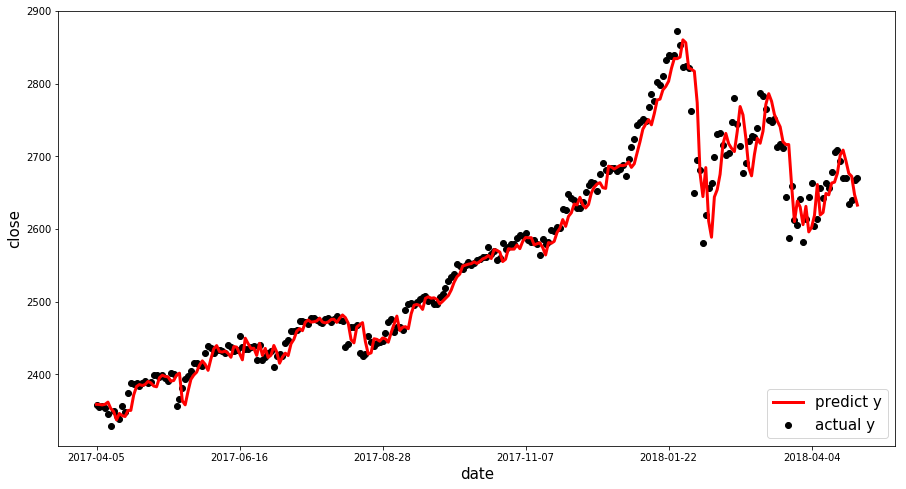

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(range(len(test_y)-1), test_y[1:],  color='black',label='actual y')
plt.plot(range(len(test_y)-1), test_y_pred[:-1], color='red',label='predict y', linewidth=3)
plt.legend(loc='lower right',prop={'size': 15})
plt.ylabel('close',fontsize=15)
plt.xlabel('date',fontsize=15)
plt.xticks(range(len(test_y)-1)[::50], date[::50])
plt.show()
plt.close()

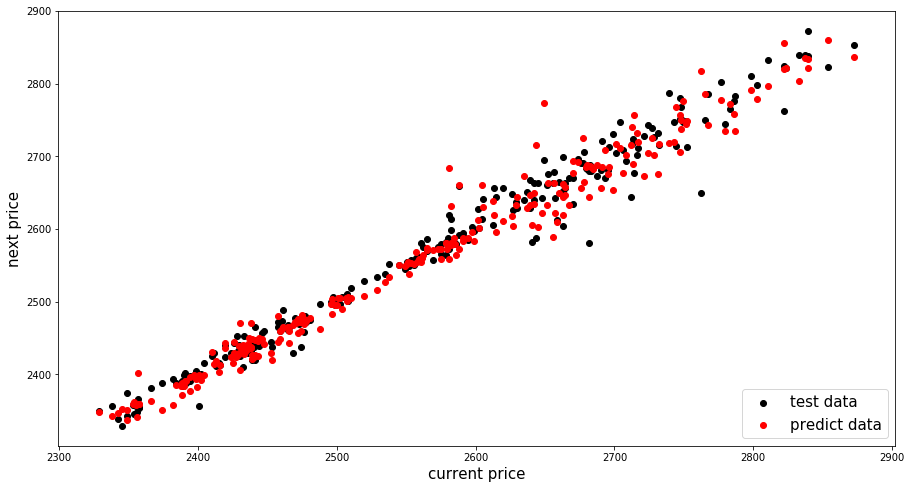

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(test_y[:-1], test_y[1:],  color='black',label='test data')
plt.scatter(test_y[:-1], test_y_pred[:-1], color='red',label='predict data')
plt.legend(loc='lower right',prop={'size': 15})
plt.ylabel('next price',fontsize=15)
plt.xlabel('current price',fontsize=15)
plt.show()
plt.close()